In [ ]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=62d7dfba6d0dd61532eb56aa5ce5b9377b6a8b6ab3d2926ac61322b6e3d78619
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

df_1 = "/content/country_profile_variables.csv"
df_2 = "/content/kiva_country_profile_variables.csv"

In [ ]:
# render and combine data
df1 = pd.read_csv(df_1)
df2 = pd.read_csv(df_2)
df = pd.concat([df1, df2], ignore_index=True)
df.drop_duplicates(subset=["country"], inplace=True)
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [ ]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Urban population (% of total population),Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Net Official Development Assist. received (% of GNI)
0,35530,54.4,106.3,20270,623.2,23.3,53.3,125,125,26.7,8.2,27.7,42,63,5,-99
1,2930,106.9,101.9,11541,3984.2,26.0,51.7,134,134,57.4,5.9,22.9,130,84,36,-99
2,41318,17.3,102.0,164779,4154.1,37.3,50.5,160,161,70.7,7.2,31.6,135,5900,55,-99
3,56,278.2,103.6,-99,-99.0,-99.0,-99.0,112,112,87.2,-99.0,-99.0,92,-99,-99,-99
4,77,163.8,102.3,2812,39896.4,10.8,88.6,-99,-99,85.1,8.1,32.1,13,1,119,-99


In [ ]:
df_numeric.columns

Index(['Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP per capita (current US$)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'Urban population (% of total population)',
       'Health: Total expenditure (% of GDP)',
       'Seats held by women in national parliaments %',
       'Individuals using the Internet (per 100 inhabitants)',
       'CO2 emission estimates (million tons/tons per capita)',
       'Energy production, primary (Petajoules)',
       'Net Official Development Assist. received (% of GNI)'],
      dtype='object')

In [ ]:
df_numeric.describe()

,Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Urban population (% of total population),Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Net Official Development Assist. received (% of GNI)
count,2.390000e+02,239.000000,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.00000,239.000000,239.000000,239.0
mean,3.413285e+04,451.212552,100.101674,3.852225e+05,13945.708368,15.985774,46.074895,100.259414,101.016736,59.369038,-11.361088,1.744770,209.16318,2743.928870,79.000000,-99.0
std,1.319691e+05,2257.625510,27.741170,1.847197e+06,23186.559296,38.706815,48.599115,61.819469,62.226745,25.069739,40.049276,45.897809,309.57457,11047.304295,121.019062,0.0
min,1.000000e+00,0.100000,-99.000000,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,-99.0
25%,4.430000e+02,35.900000,96.400000,2.718500e+03,1161.500000,15.650000,44.900000,98.500000,98.500000,39.750000,3.400000,7.300000,55.50000,2.000000,17.000000,-99.0
50%,5.709000e+03,87.300000,99.000000,1.678000e+04,4509.000000,25.800000,59.200000,111.000000,112.000000,59.700000,5.600000,17.100000,98.00000,111.000000,44.000000,-99.0
75%,2.276550e+04,224.050000,101.650000,1.160045e+05,15927.200000,32.800000,70.700000,130.000000,130.000000,79.550000,7.800000,26.950000,208.00000,976.500000,102.500000,-99.0
max,1.409517e+06,25969.800000,301.200000,1.803665e+07,169491.800000,79.900000,94.000000,199.000000,199.000000,100.000000,17.100000,61.300000,2358.00000,101394.000000,952.000000,-99.0


In [ ]:
df_numeric.isna().sum()

,0
Population in thousands (2017),0
"Population density (per km2, 2017)",0
"Sex ratio (m per 100 f, 2017)",0
GDP: Gross domestic product (million current US$),0
GDP per capita (current US$),0
Economy: Industry (% of GVA),0
Economy: Services and other activity (% of GVA),0
Agricultural production index (2004-2006=100),0
Food production index (2004-2006=100),0
Urban population (% of total population),0


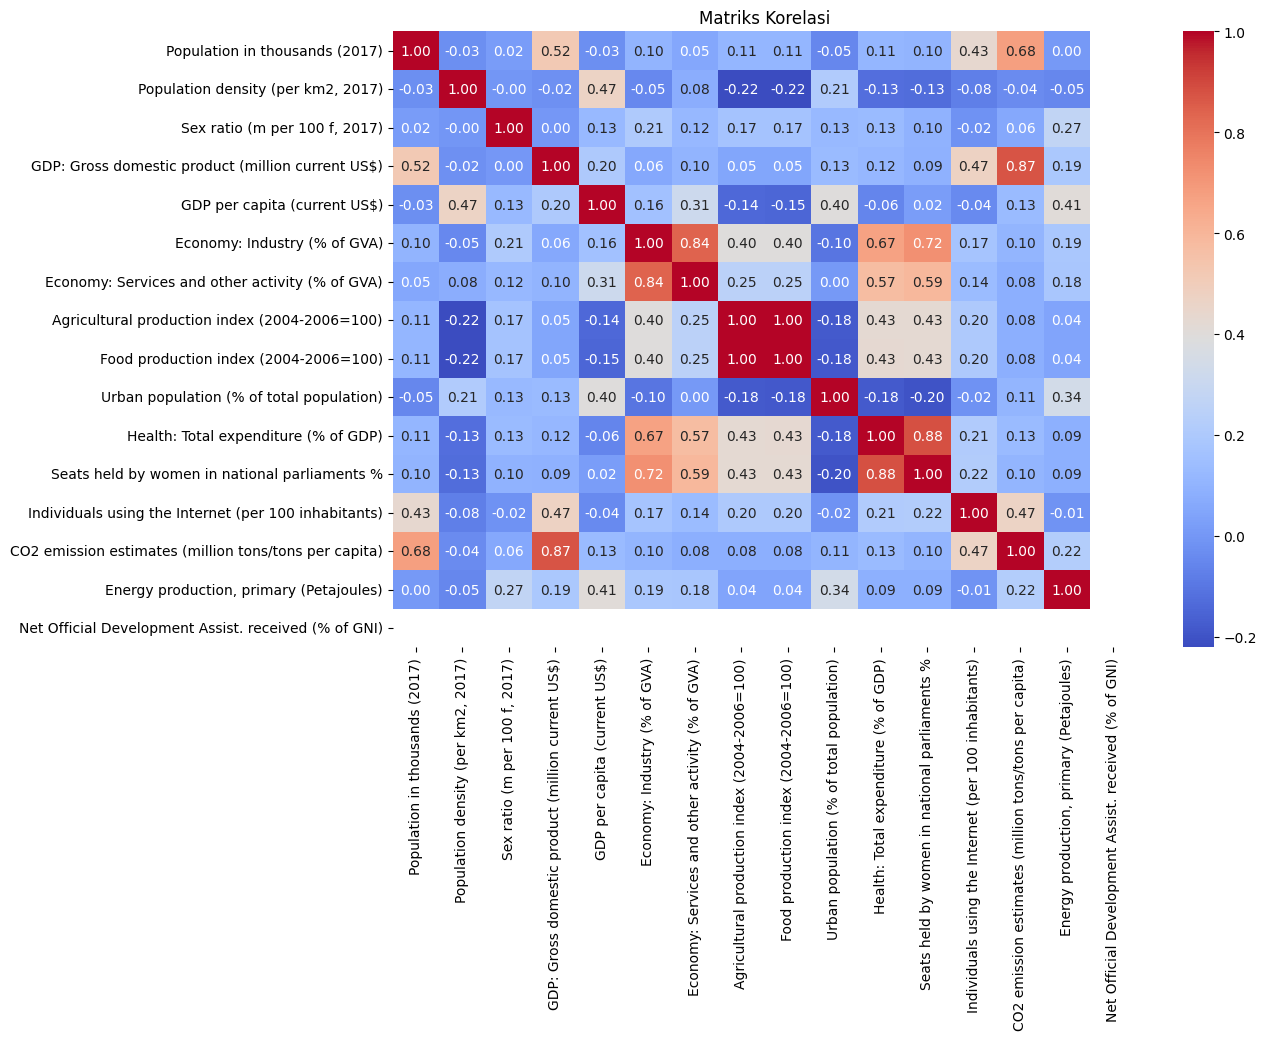

In [ ]:
# Hitung matriks korelasi
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

In [ ]:
data = df_numeric.drop(columns=['Net Official Development Assist. received (% of GNI)'])

print(data.head())  # Menampilkan 5 baris pertama untuk melihat hasil perubahan

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   
3                                                -99   
4                                               2812   

   GDP 

In [ ]:
data_standardized = (data - data.mean()) / data.std()

data_standardized

,Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Urban population (% of total population),Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)"
0,0.010587,-0.175765,0.223434,-0.197571,-0.574579,0.188965,0.148667,0.400207,0.385417,-1.303126,0.488426,0.565500,-0.539977,-0.242677,-0.611474
1,-0.236441,-0.152511,0.064825,-0.202296,-0.429624,0.258720,0.115745,0.545792,0.530050,-0.078542,0.430996,0.460920,-0.255716,-0.240776,-0.355316
2,0.054446,-0.192199,0.068430,-0.119339,-0.422297,0.550658,0.091053,0.966372,0.963947,0.451978,0.463456,0.650472,-0.239565,0.285687,-0.198316
3,-0.258219,-0.076635,0.126106,-0.208598,-0.605726,-2.970685,-2.985135,0.189917,0.176504,1.110142,-2.188277,-2.194980,-0.378465,-0.257341,-1.470843
4,-0.258059,-0.127307,0.079244,-0.207022,1.119213,-0.133976,0.875018,-3.223247,-3.214321,1.026375,0.485929,0.661366,-0.633654,-0.248289,0.330526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.175626,-0.171203,-0.082970,-0.183843,-0.563620,0.261303,-0.065328,1.225190,1.269282,-1.107672,0.423505,0.755052,2.819472,-0.163744,-0.487527
302,0.357714,-0.183960,-0.018084,-0.188206,-0.580488,0.728921,-0.209364,0.060508,0.047942,-0.672884,0.391045,0.155895,0.451706,-0.141657,-0.520579
308,2.199964,-0.184137,-0.075760,9.555789,1.816056,0.095958,0.683657,0.173741,0.192574,0.886765,0.710652,0.378128,4.211705,7.345056,1.735264
310,0.465322,-0.063391,-0.075760,-0.103931,-0.512271,0.542908,-0.038579,0.578144,0.530050,-1.027894,0.460959,0.543713,1.314180,0.021098,-0.404895


In [ ]:
cov_matrix = np.cov(data_standardized.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print('Berikut hasil egenvalues:\n', eigenvalues, '\n\nBerikut hasil egenvectors:\n', eigenvectors)

Berikut hasil egenvalues:
 [4.15608915e+00 2.64625608e+00 2.18592024e+00 1.37753169e+00
 1.01018413e+00 8.12060852e-01 8.26075177e-04 8.50994471e-02
 9.35145591e-02 1.47285776e-01 3.21367795e-01 6.56209119e-01
 4.50534192e-01 5.15907214e-01 5.41213686e-01] 

Berikut hasil egenvectors:
 [[-1.71125585e-01 -3.63703873e-01  2.68887610e-01  9.05921029e-02
   6.86736097e-02  2.56835543e-01  3.16509202e-03 -1.36859412e-01
   1.28912280e-01  1.31195529e-01 -2.66258884e-01 -1.68286037e-01
  -5.90193369e-01 -4.30869089e-01  3.85481888e-02]
 [ 9.00590768e-02 -1.34927149e-01 -3.29312797e-01  2.23694943e-01
   6.59442799e-01  2.45453138e-01 -1.51747395e-03  1.28269816e-03
   7.15562176e-02 -2.96167603e-02  4.39411981e-01 -3.61360476e-02
  -1.91231045e-01  2.05636093e-01  2.02089143e-01]
 [-1.13790831e-01 -1.40141041e-02 -1.88950261e-01 -4.42374948e-01
  -1.61057982e-01  8.14935028e-01  4.69026438e-04  2.80561387e-02
   4.88298492e-02  4.59057834e-02 -5.23418551e-02  1.55048920e-01
   1.71452178e-01

In [ ]:
num_components = len(eigenvectors)
data_pca = np.dot(data_standardized, eigenvectors)

data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(num_components)])
print(data_pca_df)

          PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.679477   1.299426  0.692423  0.385132 -0.004203  0.640359 -0.012700   
1   -0.662017   0.950412  0.211620 -0.116812  0.139534 -0.017643 -0.012175   
2   -1.294883   0.596273  0.248349 -0.561114  0.315449 -0.244144 -0.002137   
3    4.271135  -0.422222  2.154903 -2.187687  1.375771  0.072125 -0.010097   
4    1.712044  -1.120065 -2.652187  2.466456 -2.525391  0.369783  0.013337   
..        ...        ...       ...       ...       ...       ...       ...   
234 -1.982924   0.566770  1.821625  0.067273  1.000152  0.012917  0.026689   
235 -0.566598   0.524035  0.777787  0.574642 -0.083186  0.448863 -0.014422   
236 -5.356080 -10.993153  2.379851  0.049719 -0.520190 -1.307130 -0.000247   
237 -1.342434   0.411353  1.186452  0.482771  0.380474  0.329134 -0.038523   
238  4.403962  -0.489411  2.088260 -2.045856  1.413413 -0.367989 -0.009440   

          PC8       PC9      PC10      PC11      PC12      PC13

In [ ]:
loading_matrix = pd.DataFrame(eigenvectors.T,
                              columns=data.columns,
                              index=[f"PC{i+1}" for i in range(len(eigenvectors))])

print("Matriks Koefisien (Loading Scores) dari PCA:")
print(loading_matrix)

Matriks Koefisien (Loading Scores) dari PCA:
      Population in thousands (2017)  Population density (per km2, 2017)  \
PC1                        -0.171126                            0.090059   
PC2                        -0.363704                           -0.134927   
PC3                         0.268888                           -0.329313   
PC4                         0.090592                            0.223695   
PC5                         0.068674                            0.659443   
PC6                         0.256836                            0.245453   
PC7                         0.003165                           -0.001517   
PC8                        -0.136859                            0.001283   
PC9                         0.128912                            0.071556   
PC10                        0.131196                           -0.029617   
PC11                       -0.266259                            0.439412   
PC12                       -0.168286       

In [ ]:
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(data_pca_df)

ev, _ = fa.get_eigenvalues()
print("Eigenvalues:", ev)

factor_loadings = pd.DataFrame(fa.loadings_, index=data_pca_df.columns)
print(factor_loadings)

Eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
                 0             1             2             3             4
PC1   9.417617e-09 -2.747708e-09  3.747174e-09  2.628974e-08 -3.675083e-10
PC2   2.183936e-08 -2.321426e-09  2.145429e-09 -7.838705e-09  1.893345e-08
PC3   1.731477e-08  6.437850e-11  2.417635e-09 -1.632125e-09  2.012540e-09
PC4   7.544647e-08  9.053502e-09  1.007179e-08  1.747838e-08 -1.284130e-08
PC5  -1.555943e-08 -8.771581e-09 -1.027883e-08  2.636214e-08 -1.104293e-08
PC6   1.578508e-09 -1.587093e-09  4.312728e-09  2.131406e-08  2.745277e-08
PC7   1.066669e-07  5.006476e-08  3.294065e-08  5.976074e-09 -1.212130e-08
PC8  -6.453093e-09  5.527942e-08 -3.846086e-09 -2.241042e-08 -2.251197e-08
PC9  -4.608089e-08 -8.315442e-08 -1.372322e-08 -9.321479e-09  8.599062e-09
PC10 -3.461560e-08  9.348927e-09 -2.644543e-09  4.229795e-08  2.026466e-08
PC11 -3.959768e-09 -8.432138e-09 -2.933343e-09 -3.103284e-09  2.553984e-08
PC12 -4.444232e-10  1.009363e-08  2.2024

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(data_pca_df)

print("KMO Individual Scores:", kmo_all)
print("KMO Overall Score:", kmo_model)


KMO Individual Scores: [0.49820687 0.49997158 0.50621017 0.50053059 0.50209262 0.4972929
 0.50021541 0.4982863  0.50010908 0.50131366 0.50208218 0.49903626
 0.49631925 0.49893832 0.50094947]
KMO Overall Score: 0.5001291888483939
